In [2]:
## PART 1 : Install Dependencies & Run Spark Session
#install pyspark
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=e0ec54cf946eb9e7371b6ddfb9caca05288f9621d2e702a93c6e2c82db0fa41c
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [6]:
#create a sparksession
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("spark").getOrCreate()

In [9]:
from google.colab import files
uploaded = files.upload()

Saving BSdiabetes_prediction_dataset.csv to BSdiabetes_prediction_dataset.csv


In [10]:
#create spark dataframe
#file_path = "BSdiabetes_prediction_dataset.csv"
#df_diabetes_data = spark.read.csv(file_path, header=True,inferSchema=True)
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder \
    .appName("Read CSV") \
    .getOrCreate()

# File path after uploading
file_path = "/content/BSdiabetes_prediction_dataset.csv"

# Read CSV into Spark DataFrame
df_diabetes_data = spark.read.csv(file_path, header=True, inferSchema=True)

In [11]:
#display the dataframe
df_diabetes_data.show()

+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender| age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|Female|80.0|           0|            1|          never|25.19|        6.6|                140|       0|
|Female|54.0|           0|            0|        No Info|27.32|        6.6|                 80|       0|
|  Male|28.0|           0|            0|          never|27.32|        5.7|                158|       0|
|Female|36.0|           0|            0|        current|23.45|        5.0|                155|       0|
|  Male|76.0|           1|            1|        current|20.14|        4.8|                155|       0|
|Female|20.0|           0|            0|          never|27.32|        6.6|                 85|       0|
|Female|44.0|           0|            0|          never|19.31|  

In [12]:
#show amount of rows
df_diabetes_data.count()

100000

In [13]:
#print the schema
df_diabetes_data.printSchema()

root
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- smoking_history: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- HbA1c_level: double (nullable = true)
 |-- blood_glucose_level: integer (nullable = true)
 |-- diabetes: integer (nullable = true)



In [14]:
#count the total no. of diabetic and non-diabetic class (values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes)
print((df_diabetes_data.count(), len(df_diabetes_data.columns)))
df_diabetes_data.groupBy('diabetes').count().show()

(100000, 9)
+--------+-----+
|diabetes|count|
+--------+-----+
|       1| 8500|
|       0|91500|
+--------+-----+



In [15]:
#count the total no. of gender types
print((df_diabetes_data.count(), len(df_diabetes_data.columns)))
df_diabetes_data.groupBy('gender').count().show()

(100000, 9)
+------+-----+
|gender|count|
+------+-----+
|Female|58552|
| Other|   18|
|  Male|41430|
+------+-----+



In [16]:
#check to see if there are any empty values in the 'gender' column
df_diabetes_data[df_diabetes_data['gender'] == '']

DataFrame[gender: string, age: double, hypertension: int, heart_disease: int, smoking_history: string, bmi: double, HbA1c_level: double, blood_glucose_level: int, diabetes: int]

In [17]:
#get the summary statistics
df_diabetes_data.describe().show()

+-------+------+-----------------+------------------+------------------+---------------+-----------------+------------------+-------------------+-------------------+
|summary|gender|              age|      hypertension|     heart_disease|smoking_history|              bmi|       HbA1c_level|blood_glucose_level|           diabetes|
+-------+------+-----------------+------------------+------------------+---------------+-----------------+------------------+-------------------+-------------------+
|  count|100000|           100000|            100000|            100000|         100000|           100000|            100000|             100000|             100000|
|   mean|  NULL|41.88585600000013|           0.07485|           0.03942|           NULL|27.32076709999422|5.5275069999983275|          138.05806|              0.085|
| stddev|  NULL|22.51683987161704|0.2631504702289171|0.1945930169980986|           NULL|6.636783416648357|1.0706720918835468|  40.70813604870383|0.27888308976661896|
|   

In [18]:
## Data Cleaning & Preparation
#check for null values
for col in df_diabetes_data.columns:
  print(col + ":", df_diabetes_data[df_diabetes_data[col].isNull()].count())

gender: 0
age: 0
hypertension: 0
heart_disease: 0
smoking_history: 0
bmi: 0
HbA1c_level: 0
blood_glucose_level: 0
diabetes: 0


In [19]:
#look for the unnecessary values present
def count_zeros():
  columns_list = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
  for i in columns_list:
    print(i+":",df_diabetes_data[df_diabetes_data[i]==0].count())
    count_zeros()

In [20]:
#display the dataframe
df_diabetes_data.show()

+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender| age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|Female|80.0|           0|            1|          never|25.19|        6.6|                140|       0|
|Female|54.0|           0|            0|        No Info|27.32|        6.6|                 80|       0|
|  Male|28.0|           0|            0|          never|27.32|        5.7|                158|       0|
|Female|36.0|           0|            0|        current|23.45|        5.0|                155|       0|
|  Male|76.0|           1|            1|        current|20.14|        4.8|                155|       0|
|Female|20.0|           0|            0|          never|27.32|        6.6|                 85|       0|
|Female|44.0|           0|            0|          never|19.31|  

In [21]:
#drop the 'other' rows in the gender columns
string_to_remove = "Other"
df_diabetes_data = df_diabetes_data[df_diabetes_data['Gender'] != string_to_remove]

In [22]:
#count the total no. of gender types
print((df_diabetes_data.count(), len(df_diabetes_data.columns)))
df_diabetes_data.groupBy('gender').count().show()

(99982, 9)
+------+-----+
|gender|count|
+------+-----+
|Female|58552|
|  Male|41430|
+------+-----+



In [23]:
#count the total no. of smoker/non-smoker types
print((df_diabetes_data.count(), len(df_diabetes_data.columns)))
df_diabetes_data.groupBy('smoking_history').count().show()

(99982, 9)
+---------------+-----+
|smoking_history|count|
+---------------+-----+
|    not current| 6439|
|         former| 9352|
|        No Info|35810|
|        current| 9286|
|          never|35092|
|           ever| 4003|
+---------------+-----+



In [24]:
#drop the 'other' rows in the gender columns
string_to_remove_1= "No Info"
df_diabetes_data = df_diabetes_data[df_diabetes_data['smoking_history'] != string_to_remove_1]

In [25]:
#count the total no. of smoker/non-smoker types
print((df_diabetes_data.count(), len(df_diabetes_data.columns)))
df_diabetes_data.groupBy('smoking_history').count().show()

(64172, 9)
+---------------+-----+
|smoking_history|count|
+---------------+-----+
|    not current| 6439|
|         former| 9352|
|        current| 9286|
|          never|35092|
|           ever| 4003|
+---------------+-----+



In [26]:
#count the total no. of gender types
print((df_diabetes_data.count(), len(df_diabetes_data.columns)))
df_diabetes_data.groupBy('gender').count().show()

(64172, 9)
+------+-----+
|gender|count|
+------+-----+
|Female|38852|
|  Male|25320|
+------+-----+



In [27]:
#assign in the 'gender'column 'Female' = 0, and 'Male' = 1
from pyspark.sql.functions import when, col
df_diabetes_data = df_diabetes_data.withColumn("gender",
    when(col("gender") == "Female", 0).
    when(col("gender") == "Male", 1).
    otherwise(col("gender"))
)
df_diabetes_data.show()

+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender| age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|     0|80.0|           0|            1|          never|25.19|        6.6|                140|       0|
|     1|28.0|           0|            0|          never|27.32|        5.7|                158|       0|
|     0|36.0|           0|            0|        current|23.45|        5.0|                155|       0|
|     1|76.0|           1|            1|        current|20.14|        4.8|                155|       0|
|     0|20.0|           0|            0|          never|27.32|        6.6|                 85|       0|
|     0|44.0|           0|            0|          never|19.31|        6.5|                200|       1|
|     1|42.0|           0|            0|          never|33.64|  

In [28]:
#assign in the 'smoking_history': "never" = 0, "ever" = 1, "not current" = 2, "current" = 3, "former" = 4
from pyspark.sql.functions import when, col
df_diabetes_data = df_diabetes_data.withColumn("smoking_history",
    when(col("smoking_history") == "never", 0).
    when(col("smoking_history") == "ever", 1).
    when(col("smoking_history") == "not current", 2).
    when(col("smoking_history") == "current", 3).
    when(col("smoking_history") == "former", 4).
    when(col("smoking_history") == "No Info", 5).
    otherwise(col("smoking_history")).cast('int')
)
df_diabetes_data.show()



+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender| age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+----+------------+-------------+---------------+-----+-----------+-------------------+--------+
|     0|80.0|           0|            1|              0|25.19|        6.6|                140|       0|
|     1|28.0|           0|            0|              0|27.32|        5.7|                158|       0|
|     0|36.0|           0|            0|              3|23.45|        5.0|                155|       0|
|     1|76.0|           1|            1|              3|20.14|        4.8|                155|       0|
|     0|20.0|           0|            0|              0|27.32|        6.6|                 85|       0|
|     0|44.0|           0|            0|              0|19.31|        6.5|                200|       1|
|     1|42.0|           0|            0|              0|33.64|  

In [29]:
from pyspark.sql.functions import col

# Convert 'age' column to integer data type
df_diabetes_data = df_diabetes_data.withColumn("age", col("age").cast('int'))

# Show the DataFrame to verify the changes
df_diabetes_data.show()

+------+---+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender|age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+---+------------+-------------+---------------+-----+-----------+-------------------+--------+
|     0| 80|           0|            1|              0|25.19|        6.6|                140|       0|
|     1| 28|           0|            0|              0|27.32|        5.7|                158|       0|
|     0| 36|           0|            0|              3|23.45|        5.0|                155|       0|
|     1| 76|           1|            1|              3|20.14|        4.8|                155|       0|
|     0| 20|           0|            0|              0|27.32|        6.6|                 85|       0|
|     0| 44|           0|            0|              0|19.31|        6.5|                200|       1|
|     1| 42|           0|            0|              0|33.64|        4.8|

In [30]:
df_diabetes_data.dtypes

[('gender', 'string'),
 ('age', 'int'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('smoking_history', 'int'),
 ('bmi', 'double'),
 ('HbA1c_level', 'double'),
 ('blood_glucose_level', 'int'),
 ('diabetes', 'int')]

In [31]:
# gender and smoking_history needs to be converted to float data type for model to work
df_diabetes_data = df_diabetes_data.withColumn("gender", col("gender").cast('float'))
df_diabetes_data = df_diabetes_data.withColumn("smoking_history", col("smoking_history").cast('float'))
df_diabetes_data.show()

+------+---+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender|age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+---+------------+-------------+---------------+-----+-----------+-------------------+--------+
|   0.0| 80|           0|            1|            0.0|25.19|        6.6|                140|       0|
|   1.0| 28|           0|            0|            0.0|27.32|        5.7|                158|       0|
|   0.0| 36|           0|            0|            3.0|23.45|        5.0|                155|       0|
|   1.0| 76|           1|            1|            3.0|20.14|        4.8|                155|       0|
|   0.0| 20|           0|            0|            0.0|27.32|        6.6|                 85|       0|
|   0.0| 44|           0|            0|            0.0|19.31|        6.5|                200|       1|
|   1.0| 42|           0|            0|            0.0|33.64|        4.8|

In [32]:
from pyspark.sql.functions import col

# Convert 'gender' and 'smoking_history' columns to float data type
df_diabetes_data = df_diabetes_data.withColumn("gender", col("gender").cast('float'))
df_diabetes_data = df_diabetes_data.withColumn("smoking_history", col("smoking_history").cast('float'))

# Show the DataFrame to verify the changes
df_diabetes_data.show()

+------+---+------------+-------------+---------------+-----+-----------+-------------------+--------+
|gender|age|hypertension|heart_disease|smoking_history|  bmi|HbA1c_level|blood_glucose_level|diabetes|
+------+---+------------+-------------+---------------+-----+-----------+-------------------+--------+
|   0.0| 80|           0|            1|            0.0|25.19|        6.6|                140|       0|
|   1.0| 28|           0|            0|            0.0|27.32|        5.7|                158|       0|
|   0.0| 36|           0|            0|            3.0|23.45|        5.0|                155|       0|
|   1.0| 76|           1|            1|            3.0|20.14|        4.8|                155|       0|
|   0.0| 20|           0|            0|            0.0|27.32|        6.6|                 85|       0|
|   0.0| 44|           0|            0|            0.0|19.31|        6.5|                200|       1|
|   1.0| 42|           0|            0|            0.0|33.64|        4.8|

In [33]:
##PART 4: Correlation Analysis & Feature Selection
#find the correlation among the set of input & output variables
for i in df_diabetes_data.columns:
  print("Correlation to outcome for {} is {}".format(i, df_diabetes_data.stat.corr("diabetes",i)))

Correlation to outcome for gender is 0.05699689368565596
Correlation to outcome for age is 0.26083296824208985
Correlation to outcome for hypertension is 0.19222574901207254
Correlation to outcome for heart_disease is 0.16961397731730365
Correlation to outcome for smoking_history is 0.06472564826560573
Correlation to outcome for bmi is 0.20442115545137657
Correlation to outcome for HbA1c_level is 0.43889709468177335
Correlation to outcome for blood_glucose_level is 0.449697968864106
Correlation to outcome for diabetes is 1.0


In [34]:
# #feature selection
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = ['gender', 'age', 'hypertension', 'heart_disease',
                                         'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'], outputCol='features')
output_data = assembler.transform(df_diabetes_data)

In [35]:
## PART 5: Split Dataset & Build the Model
#create final data
from pyspark.ml.classification import LogisticRegression

final_data = output_data.select('features','diabetes')

In [36]:
#print schema of final data
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- diabetes: integer (nullable = true)



In [37]:
#split the dataset ; build the model
train, test = final_data.randomSplit([0.7, 0.3])
models = LogisticRegression(labelCol= 'diabetes')
model = models.fit(train)

In [38]:
#summary of the model
summary = model.summary
summary.predictions.describe().show()

+-------+-------------------+-------------------+
|summary|           diabetes|         prediction|
+-------+-------------------+-------------------+
|  count|              44840|              44840|
|   mean|0.11123996431757359|0.08307314897413023|
| stddev| 0.3144325675863664| 0.2759958327270045|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



In [39]:
## PART 6: Evaluate and Save the Model
from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions = model.evaluate(test)

In [40]:
predictions.predictions.show(10)

+--------------------+--------+--------------------+--------------------+----------+
|            features|diabetes|       rawPrediction|         probability|prediction|
+--------------------+--------+--------------------+--------------------+----------+
|(8,[0,5,6,7],[1.0...|       0|[12.3304830086977...|[0.99999558493244...|       0.0|
|(8,[0,5,6,7],[1.0...|       0|[8.77104345535662...|[0.99984486247942...|       0.0|
|(8,[0,5,6,7],[1.0...|       0|[11.6507680716300...|[0.99999128771782...|       0.0|
|(8,[1,5,6,7],[1.0...|       0|[11.0063084482952...|[0.99998340360483...|       0.0|
|(8,[1,5,6,7],[1.0...|       0|[8.00624176917404...|[0.99966673583323...|       0.0|
|(8,[1,5,6,7],[1.0...|       0|[8.01651956361091...|[0.99967014238807...|       0.0|
|(8,[1,5,6,7],[1.0...|       0|[6.29763978410489...|[0.99816273777418...|       0.0|
|(8,[1,5,6,7],[1.0...|       0|[8.68165553574813...|[0.99983035884270...|       0.0|
|(8,[1,5,6,7],[1.0...|       0|[5.24231609911325...|[0.9947398206

In [41]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol= 'rawPrediction', labelCol='diabetes')
evaluator.evaluate(model.transform(test))

0.9539048529317621

In [42]:
# save model
# model.save("model")

In [45]:
# # load saved model back to the environment
# # from pyspark.ml.classification import LogisticRegressionModel

# #model = LogisticRegressionModel.load('model')
# from pyspark.ml.classification import LogisticRegressionModel

# # Double-check the path provided to load the model
# model_path = 'model'

# # Load the model
# try:
#     model = LogisticRegressionModel.load(model_path)
#     print("Model loaded successfully!")
# except Exception as e:
#     print("Error loading the model:", e)


In [ ]:
# ## PART 7: Prediction on New Data with the saved model
# # Create a new spark dataframe
# test_df = spark.read.csv('C:\\path\\to\\beauty_diabetes_prediction_dataset.csv', header=True, inferSchema=True)



In [ ]:
# #print the schema
# test_df.printSchema()

In [47]:
#create an additional feature merged column
#test_data = assembler.transform(test_df)

In [48]:
#print the schema
#test_data.printSchema()

In [ ]:
# #use model to make predictions
# results = model.transform(test_data)
# results.printSchema()

In [ ]:
# #display the predictions
# results.select('features','prediction').show()

In [ ]:
# #display the predictions
# results.select('features','prediction').show()

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
# Convert PySpark DataFrame to Pandas DataFrame
df_diabetes_pd = df_diabetes_data.toPandas()

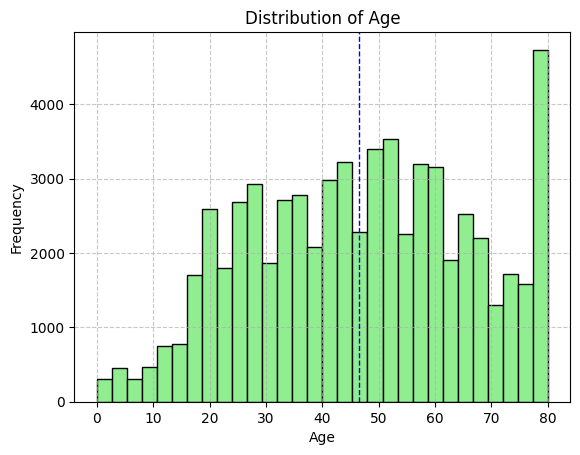

In [52]:
# Histogram of Age
plt.hist(df_diabetes_pd['age'], bins=30, color='lightgreen', edgecolor='black')
plt.axvline(df_diabetes_pd['age'].mean(), color='b', linestyle='--', linewidth=1)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

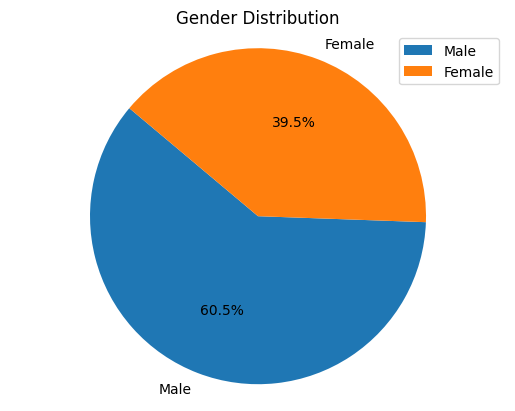

In [54]:
# Pie Chart of Gender Distribution
gender_counts = df_diabetes_pd['gender'].value_counts()
gender_counts.index = ['Male' if idx == 0 else 'Female' for idx in gender_counts.index]
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.legend(labels=gender_counts.index, loc='upper right')
plt.axis('equal')
plt.show()

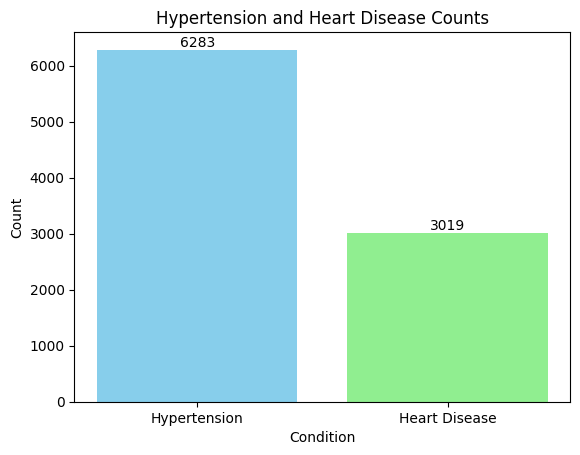

In [58]:
# Bar Chart of Hypertension and Heart Disease
condition_counts = df_diabetes_pd[['hypertension', 'heart_disease']].sum()
conditions = ['Hypertension', 'Heart Disease']
plt.bar(conditions, condition_counts, color=['skyblue', 'lightgreen'])
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Hypertension and Heart Disease Counts')

# Add value labels on top of each bar
for i, count in enumerate(condition_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

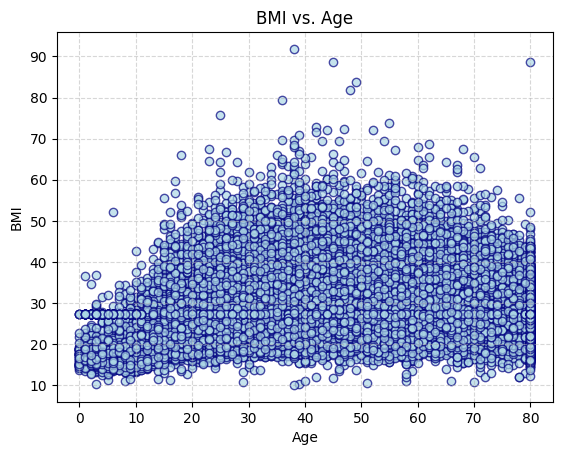

In [59]:
# Scatter Plot of BMI vs. Age
# data points
x = df_diabetes_pd['age']
y = df_diabetes_pd['bmi']
plt.scatter(df_diabetes_pd['age'], df_diabetes_pd['bmi'], color='lightblue', alpha=0.7, edgecolor='navy')
# Add labels and title
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI vs. Age')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<ipython-input-63-ecdd684bdf09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='blood_glucose_level', data=df_diabetes_pd, palette='Set2')


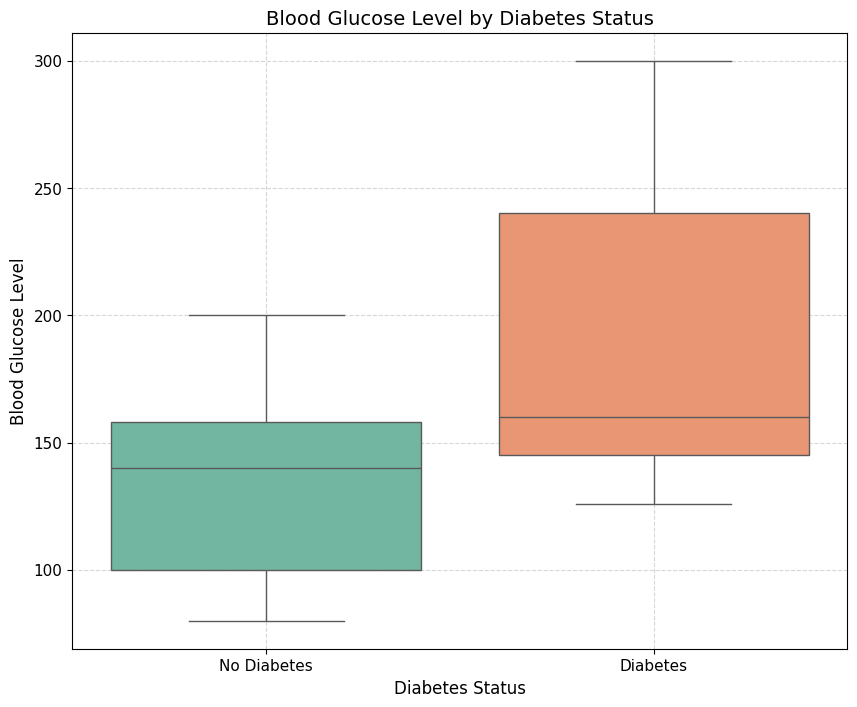

In [63]:
# Boxplot of Blood Glucose Level by Diabetes Status
plt.figure(figsize=(10, 8))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df_diabetes_pd, palette='Set2')
# Add labels and title
plt.xlabel('Diabetes Status', fontsize=12)
plt.ylabel('Blood Glucose Level', fontsize=12)
plt.title('Blood Glucose Level by Diabetes Status', fontsize=14)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()